(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

10


e:\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\anaconda3\envs\py37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

PCA Results:
 Number of PCs  Accuracy
             1    0.1196
             2    0.1466
             3    0.1669
             4    0.1822
             5    0.2151
             6    0.2444
             7    0.2670
             8    0.2756
             9    0.2969
            10    0.3071
            11    0.3126
            12    0.3265
            13    0.3341
            14    0.3420
            15    0.3439
            16    0.3491
            17    0.3539
            18    0.3629
            19    0.3708
            20    0.3725
            21    0.3745
            22    0.3760
            23    0.3783
            24    0.3777
            25    0.3852
            26    0.3840
            27    0.3871
            28    0.3885
            29    0.3886
            30    0.3900
            31    0.3881
            32    0.3895
            33    0.3898
            34    0.3904
            35    0.3888
            36    0.3909
            37    0.3912
            38    0.3888
            

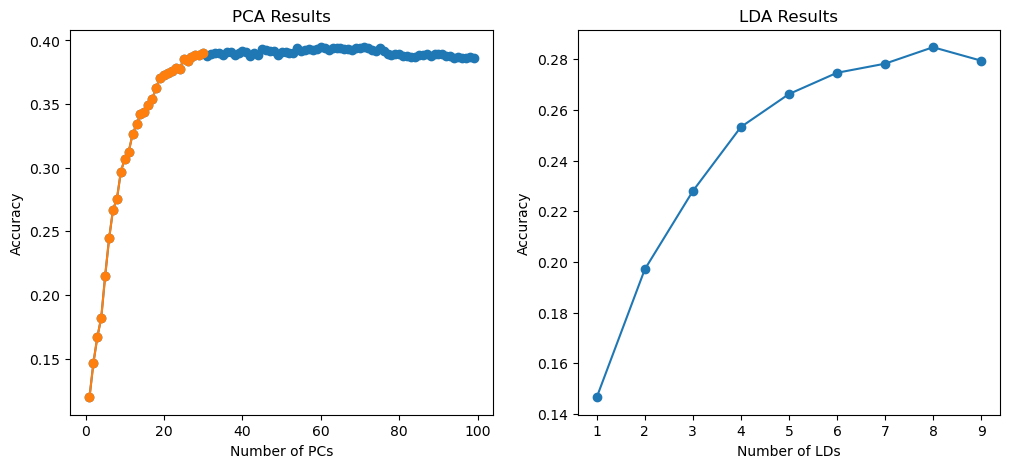

In [1]:
# Import required libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset and preprocess the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# PCA
pca_results = []
for pc in range(1, 100):
    # Apply PCA and train classifier
    pca = PCA(n_components=pc)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train classifier
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_pca, y_train)
    
    # Predict on testing set and evaluate performance
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    pca_results.append([pc, accuracy])

# LDA
lda_results = []
num_classes = len(np.unique(y_train))
print(num_classes)
for ld in range(1, num_classes):
    # Apply LDA and train classifier
    lda = LinearDiscriminantAnalysis(n_components=ld)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
    # Train classifier
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_lda, y_train)
    
    # Predict on testing set and evaluate performance
    y_pred = classifier.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    lda_results.append([ld, accuracy])

# Print results in table
pca_df = pd.DataFrame(pca_results, columns=['Number of PCs', 'Accuracy'])
lda_df = pd.DataFrame(lda_results, columns=['Number of LDs', 'Accuracy'])

print("PCA Results:")
print(pca_df.to_string(index=False))
print("\nLDA Results:")
print(lda_df.to_string(index=False))

# Visualize results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(pca_df['Number of PCs'], pca_df['Accuracy'], '-o')
ax[0].plot(pca_df['Number of PCs'][0:30], pca_df['Accuracy'][0:30], '-o')
ax[0].set_xlabel('Number of PCs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('PCA Results')
ax[1].plot(lda_df['Number of LDs'], lda_df['Accuracy'], '-o')
ax[1].set_xlabel('Number of LDs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('LDA Results')
plt.show()